In [2]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"


list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
for event in list_evO1O2:
    print(event)
    filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples



list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
                           "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
for event in list(list_evO3a):
    if event != '190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/GW{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples


list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
              "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
for event in list(list_evO3b):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")



150914
Using Overall_posterior posterior with a total of 8350 samples
151012
Using Overall_posterior posterior with a total of 16096 samples
151226
Using Overall_posterior posterior with a total of 52252 samples
170104
Using Overall_posterior posterior with a total of 24972 samples
170608
Using Overall_posterior posterior with a total of 6448 samples
170729
Using Overall_posterior posterior with a total of 5112 samples
170809
Using Overall_posterior posterior with a total of 14802 samples
170814
Using Overall_posterior posterior with a total of 40000 samples
170818
Using Overall_posterior posterior with a total of 5862 samples
170823
Using Overall_posterior posterior with a total of 4278 samples
190408_181802
Using PublicationSamples posterior with a total of 37366 samples
190412
Using PublicationSamples posterior with a total of 23984 samples
190413_134308
Using PublicationSamples posterior with a total of 38056 samples
190421_213856
Using PublicationSamples posterior with a total of 

In [3]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

In [4]:
population_model = "PBH-power-2nd"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_2/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [5]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict


{'α': Uniform(minimum=1.05, maximum=4.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None),
 'M': Uniform(minimum=3.0, maximum=10.0, name='$M$', latex_label='$M$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

17:09 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-power-2nd_flatLCDM_2/'
17:09 bilby INFO    : Search parameters:
17:09 bilby INFO    :   α = Uniform(minimum=1.05, maximum=4.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None)
17:09 bilby INFO    :   M = Uniform(minimum=3.0, maximum=10.0, name='$M$', latex_label='$M$', unit=None, boundary=None)
17:09 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None)
17:09 bilby INFO    :   H0 = 67.4
17:09 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:109: RuntimeWarning: divide by zero encountered in log
17:10 bilby INFO    : Single likelihood evaluation took 6.432e-01 s


0it [00:00, ?it/s]

17:10 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f7e8afd72e0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
17:10 bilby INFO    : Checkpoint every check_point_delta_t = 60s
17:10 bilby INFO    : Using dynesty version 1.0.1
17:10 bilby INFO    : Using the bilby-implemented rwalk sampl

605it [16:28,  4.44it/s, bound:0 nc: 12 ncall:2.5e+03 eff:24.3% logz=-1993.11+/-0.15 dlogz:223.299>0.1]   

17:27 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


880it [17:49,  3.58it/s, bound:0 nc:  9 ncall:4.5e+03 eff:19.5% logz=-1907.61+/-0.15 dlogz:137.633>0.1]

17:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1062it [19:12,  1.67it/s, bound:0 nc: 16 ncall:6.5e+03 eff:16.3% logz=-1862.34+/-0.15 dlogz:91.893>0.1] 

17:30 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1178it [20:35,  1.38it/s, bound:0 nc: 16 ncall:8.5e+03 eff:13.8% logz=-1842.98+/-0.15 dlogz:72.340>0.1]

17:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1256it [21:57,  1.11it/s, bound:0 nc: 85 ncall:1.1e+04 eff:11.9% logz=-1832.17+/-0.15 dlogz:61.272>0.1]

17:32 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1324it [23:21,  1.78s/it, bound:0 nc: 32 ncall:1.3e+04 eff:10.5% logz=-1824.84+/-0.15 dlogz:53.860>0.1]

17:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1396it [25:02,  1.65s/it, bound:3 nc: 28 ncall:1.4e+04 eff:9.7% logz=-1818.78+/-0.15 dlogz:47.598>0.1] 

17:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1454it [26:14,  1.34s/it, bound:8 nc: 29 ncall:1.6e+04 eff:9.0% logz=-1815.04+/-0.15 dlogz:43.727>0.1]

17:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1514it [27:28,  1.33s/it, bound:14 nc: 34 ncall:1.8e+04 eff:8.4% logz=-1811.54+/-0.15 dlogz:40.124>0.1]

17:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1575it [28:43,  1.34s/it, bound:21 nc: 32 ncall:2.0e+04 eff:7.9% logz=-1808.27+/-0.15 dlogz:36.722>0.1]

17:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1636it [29:56,  1.33s/it, bound:27 nc: 26 ncall:2.2e+04 eff:7.4% logz=-1805.05+/-0.15 dlogz:33.383>0.1]

17:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1696it [31:13,  1.39s/it, bound:33 nc: 31 ncall:2.4e+04 eff:7.0% logz=-1802.10+/-0.15 dlogz:30.288>0.1]

17:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1758it [32:29,  1.37s/it, bound:40 nc: 33 ncall:2.6e+04 eff:6.7% logz=-1800.27+/-0.14 dlogz:28.324>0.1]

17:43 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1817it [33:49,  1.44s/it, bound:46 nc: 32 ncall:2.8e+04 eff:6.4% logz=-1798.70+/-0.14 dlogz:26.765>0.1]

17:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1878it [35:07,  1.42s/it, bound:53 nc: 39 ncall:3.0e+04 eff:6.2% logz=-1797.11+/-0.15 dlogz:25.056>0.1]

17:45 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1940it [36:26,  1.39s/it, bound:60 nc: 38 ncall:3.3e+04 eff:5.9% logz=-1795.54+/-0.15 dlogz:23.354>0.1]

17:47 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2002it [37:45,  1.36s/it, bound:67 nc: 32 ncall:3.5e+04 eff:5.7% logz=-1794.01+/-0.15 dlogz:21.703>0.1]

17:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2061it [39:09,  1.43s/it, bound:74 nc: 39 ncall:3.7e+04 eff:5.5% logz=-1792.73+/-0.15 dlogz:20.299>0.1]

17:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2121it [40:32,  1.40s/it, bound:81 nc: 38 ncall:4.0e+04 eff:5.4% logz=-1791.18+/-0.15 dlogz:18.634>0.1]

17:51 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2184it [41:57,  1.43s/it, bound:89 nc: 37 ncall:4.2e+04 eff:5.2% logz=-1789.89+/-0.15 dlogz:17.216>0.1]

17:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2248it [43:21,  1.39s/it, bound:97 nc: 38 ncall:4.4e+04 eff:5.1% logz=-1788.69+/-0.15 dlogz:15.883>0.1]

17:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2310it [44:46,  1.47s/it, bound:105 nc: 38 ncall:4.7e+04 eff:4.9% logz=-1787.50+/-0.15 dlogz:14.571>0.1]

17:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2372it [46:13,  1.48s/it, bound:113 nc: 40 ncall:4.9e+04 eff:4.8% logz=-1786.46+/-0.15 dlogz:13.405>0.1]

17:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2432it [47:39,  1.44s/it, bound:121 nc: 38 ncall:5.2e+04 eff:4.7% logz=-1785.53+/-0.15 dlogz:12.355>0.1]

17:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2495it [49:05,  1.46s/it, bound:129 nc: 40 ncall:5.4e+04 eff:4.6% logz=-1784.67+/-0.15 dlogz:11.370>0.1]

17:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2557it [50:33,  1.44s/it, bound:137 nc: 40 ncall:5.7e+04 eff:4.5% logz=-1783.97+/-0.15 dlogz:10.537>0.1]

18:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2618it [51:59,  1.49s/it, bound:145 nc: 39 ncall:6.0e+04 eff:4.4% logz=-1783.35+/-0.15 dlogz:9.799>0.1] 

18:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2682it [53:25,  1.42s/it, bound:153 nc: 40 ncall:6.2e+04 eff:4.3% logz=-1782.74+/-0.15 dlogz:9.060>0.1]

18:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2745it [54:52,  1.47s/it, bound:161 nc: 40 ncall:6.5e+04 eff:4.2% logz=-1782.19+/-0.15 dlogz:8.383>0.1]

18:05 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2806it [56:19,  1.47s/it, bound:169 nc: 40 ncall:6.7e+04 eff:4.2% logz=-1781.72+/-0.15 dlogz:7.793>0.1]

18:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2868it [57:46,  1.53s/it, bound:177 nc: 40 ncall:7.0e+04 eff:4.1% logz=-1781.24+/-0.15 dlogz:7.190>0.1]

18:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2931it [59:12,  1.46s/it, bound:185 nc: 40 ncall:7.2e+04 eff:4.1% logz=-1780.79+/-0.15 dlogz:6.614>0.1]

18:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2991it [1:00:38,  1.44s/it, bound:193 nc: 40 ncall:7.5e+04 eff:4.0% logz=-1780.41+/-0.15 dlogz:6.110>0.1]

18:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3053it [1:02:05,  1.46s/it, bound:201 nc: 40 ncall:7.7e+04 eff:3.9% logz=-1780.06+/-0.16 dlogz:5.639>0.1]

18:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3112it [1:03:31,  1.46s/it, bound:208 nc: 40 ncall:8.0e+04 eff:3.9% logz=-1779.74+/-0.16 dlogz:5.207>0.1]

18:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3171it [1:04:57,  1.52s/it, bound:216 nc: 40 ncall:8.3e+04 eff:3.8% logz=-1779.45+/-0.16 dlogz:4.792>0.1]

18:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3232it [1:06:24,  1.47s/it, bound:224 nc: 40 ncall:8.5e+04 eff:3.8% logz=-1779.17+/-0.16 dlogz:4.626>0.1]

18:17 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3293it [1:07:50,  1.49s/it, bound:232 nc: 40 ncall:8.8e+04 eff:3.8% logz=-1778.91+/-0.16 dlogz:4.251>0.1]

18:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3355it [1:09:16,  1.45s/it, bound:240 nc: 40 ncall:9.0e+04 eff:3.7% logz=-1778.67+/-0.16 dlogz:3.893>0.1]

18:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3414it [1:10:43,  1.53s/it, bound:248 nc: 80 ncall:9.3e+04 eff:3.7% logz=-1778.47+/-0.16 dlogz:3.578>0.1]

18:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:21 bilby INFO    : Writing 104 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3476it [1:12:10,  1.47s/it, bound:256 nc: 40 ncall:9.5e+04 eff:3.6% logz=-1778.27+/-0.16 dlogz:3.271>0.1]

18:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:23 bilby INFO    : Writing 125 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3538it [1:13:35,  1.48s/it, bound:264 nc: 40 ncall:9.8e+04 eff:3.6% logz=-1778.10+/-0.16 dlogz:2.984>0.1]

18:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:24 bilby INFO    : Writing 140 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3601it [1:15:01,  1.44s/it, bound:272 nc: 40 ncall:1.0e+05 eff:3.6% logz=-1777.94+/-0.16 dlogz:2.717>0.1]

18:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:25 bilby INFO    : Writing 182 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3662it [1:16:27,  1.50s/it, bound:280 nc: 40 ncall:1.0e+05 eff:3.6% logz=-1777.80+/-0.16 dlogz:2.476>0.1]

18:27 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:27 bilby INFO    : Writing 181 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3723it [1:17:53,  1.48s/it, bound:288 nc: 40 ncall:1.1e+05 eff:3.5% logz=-1777.67+/-0.16 dlogz:2.249>0.1]

18:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:28 bilby INFO    : Writing 199 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3786it [1:19:18,  1.39s/it, bound:296 nc: 40 ncall:1.1e+05 eff:3.5% logz=-1777.55+/-0.16 dlogz:2.034>0.1]

18:30 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:30 bilby INFO    : Writing 230 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3847it [1:20:44,  1.45s/it, bound:304 nc: 40 ncall:1.1e+05 eff:3.5% logz=-1777.45+/-0.16 dlogz:1.843>0.1]

18:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:31 bilby INFO    : Writing 241 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3908it [1:22:10,  1.42s/it, bound:312 nc: 40 ncall:1.1e+05 eff:3.5% logz=-1777.36+/-0.16 dlogz:1.667>0.1]

18:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:33 bilby INFO    : Writing 307 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3969it [1:23:36,  1.46s/it, bound:319 nc: 40 ncall:1.2e+05 eff:3.4% logz=-1777.28+/-0.16 dlogz:1.503>0.1]

18:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:34 bilby INFO    : Writing 342 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4030it [1:25:01,  1.43s/it, bound:327 nc: 40 ncall:1.2e+05 eff:3.4% logz=-1777.20+/-0.16 dlogz:1.360>0.1]

18:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:35 bilby INFO    : Writing 385 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4092it [1:26:28,  1.47s/it, bound:335 nc: 40 ncall:1.2e+05 eff:3.4% logz=-1777.13+/-0.16 dlogz:1.219>0.1]

18:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:37 bilby INFO    : Writing 403 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4154it [1:27:56,  1.46s/it, bound:343 nc: 40 ncall:1.2e+05 eff:3.4% logz=-1777.07+/-0.16 dlogz:1.089>0.1]

18:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:38 bilby INFO    : Writing 450 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4217it [1:29:23,  1.49s/it, bound:351 nc: 40 ncall:1.3e+05 eff:3.3% logz=-1777.00+/-0.16 dlogz:0.969>0.1]

18:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:40 bilby INFO    : Writing 528 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4279it [1:30:51,  1.48s/it, bound:359 nc: 40 ncall:1.3e+05 eff:3.3% logz=-1776.95+/-0.16 dlogz:0.862>0.1]

18:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:41 bilby INFO    : Writing 622 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4340it [1:32:18,  1.52s/it, bound:367 nc: 40 ncall:1.3e+05 eff:3.3% logz=-1776.90+/-0.16 dlogz:0.768>0.1]

18:43 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:43 bilby INFO    : Writing 672 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4403it [1:33:44,  1.46s/it, bound:375 nc: 40 ncall:1.3e+05 eff:3.3% logz=-1776.86+/-0.16 dlogz:0.684>0.1]

18:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:44 bilby INFO    : Writing 798 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4465it [1:35:12,  1.52s/it, bound:383 nc: 40 ncall:1.4e+05 eff:3.3% logz=-1776.82+/-0.16 dlogz:0.607>0.1]

18:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:46 bilby INFO    : Writing 876 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4520it [1:36:38,  1.59s/it, bound:391 nc: 40 ncall:1.4e+05 eff:3.3% logz=-1776.79+/-0.16 dlogz:0.545>0.1]

18:47 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:47 bilby INFO    : Writing 953 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4582it [1:38:04,  1.44s/it, bound:399 nc: 40 ncall:1.4e+05 eff:3.2% logz=-1776.76+/-0.16 dlogz:0.498>0.1]

18:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:48 bilby INFO    : Writing 1103 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4642it [1:39:31,  1.51s/it, bound:407 nc: 40 ncall:1.4e+05 eff:3.2% logz=-1776.73+/-0.16 dlogz:0.442>0.1]

18:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:50 bilby INFO    : Writing 1195 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4697it [1:40:58,  1.57s/it, bound:415 nc: 40 ncall:1.5e+05 eff:3.2% logz=-1776.70+/-0.16 dlogz:0.397>0.1]

18:51 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:51 bilby INFO    : Writing 1344 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4753it [1:42:25,  1.63s/it, bound:422 nc: 40 ncall:1.5e+05 eff:3.2% logz=-1776.68+/-0.16 dlogz:0.355>0.1]

18:53 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:53 bilby INFO    : Writing 1524 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4814it [1:43:51,  1.49s/it, bound:430 nc: 40 ncall:1.5e+05 eff:3.2% logz=-1776.66+/-0.16 dlogz:0.314>0.1]

18:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:54 bilby INFO    : Writing 1630 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4873it [1:45:19,  1.57s/it, bound:438 nc: 80 ncall:1.5e+05 eff:3.2% logz=-1776.64+/-0.16 dlogz:0.280>0.1]

18:56 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:56 bilby INFO    : Writing 1615 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4932it [1:46:46,  1.51s/it, bound:446 nc: 40 ncall:1.6e+05 eff:3.1% logz=-1776.63+/-0.16 dlogz:0.248>0.1]

18:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:57 bilby INFO    : Writing 1642 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4989it [1:48:13,  1.60s/it, bound:454 nc: 40 ncall:1.6e+05 eff:3.1% logz=-1776.61+/-0.16 dlogz:0.222>0.1]

18:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
18:59 bilby INFO    : Writing 1600 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5043it [1:49:40,  1.66s/it, bound:462 nc: 40 ncall:1.6e+05 eff:3.1% logz=-1776.60+/-0.16 dlogz:0.199>0.1]

19:00 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
19:00 bilby INFO    : Writing 1671 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5103it [1:51:08,  1.62s/it, bound:470 nc: 40 ncall:1.6e+05 eff:3.1% logz=-1776.59+/-0.16 dlogz:0.187>0.1]

19:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
19:02 bilby INFO    : Writing 1652 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5161it [1:52:35,  1.60s/it, bound:478 nc: 40 ncall:1.7e+05 eff:3.1% logz=-1776.58+/-0.16 dlogz:0.166>0.1]

19:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
19:03 bilby INFO    : Writing 1657 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5225it [1:54:00,  1.41s/it, bound:486 nc: 38 ncall:1.7e+05 eff:3.1% logz=-1776.57+/-0.16 dlogz:0.146>0.1]

19:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
19:04 bilby INFO    : Writing 1638 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5287it [1:55:27,  1.45s/it, bound:494 nc: 40 ncall:1.7e+05 eff:3.1% logz=-1776.56+/-0.16 dlogz:0.129>0.1]

19:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
19:06 bilby INFO    : Writing 1642 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5342it [1:56:53,  1.53s/it, bound:502 nc: 40 ncall:1.7e+05 eff:3.1% logz=-1776.55+/-0.16 dlogz:0.116>0.1]

19:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
19:07 bilby INFO    : Writing 1631 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5402it [1:58:20,  1.54s/it, bound:510 nc: 40 ncall:1.8e+05 eff:3.1% logz=-1776.54+/-0.16 dlogz:0.102>0.1]

19:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
19:09 bilby INFO    : Writing 1619 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5408it [1:58:22,  1.41s/it, bound:510 nc: 40 ncall:1.8e+05 eff:3.0% logz=-1776.54+/-0.16 dlogz:0.101>0.1]

19:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_resume.pickle
19:09 bilby INFO    : Writing 1645 current samples to H0_GWTC-3_PBH-power-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
19:09 bilby INFO    : Starting to close worker pool.
19:09 bilby INFO    : Finished closing worker pool.


5413it [1:58:24,  1.31s/it, bound:511 nc:  1 ncall:1.8e+05 eff:3.3% logz=-1776.47+/-0.17 dlogz:0.000>0.1]

19:09 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
19:09 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
19:09 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
19:09 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
19:09 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.


19:09 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
19:09 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
19:09 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
19:09 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
19:09 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
19:09 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
19:09 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
19:09 bilby INFO    : Sampling time: 1:43:13.349120
19:09 bilby INFO    : Summary of results:
nsamples: 5913
ln_noise_evidence:    nan
ln_evidence: -1776.472 +/-  0.166
ln_bayes_fac

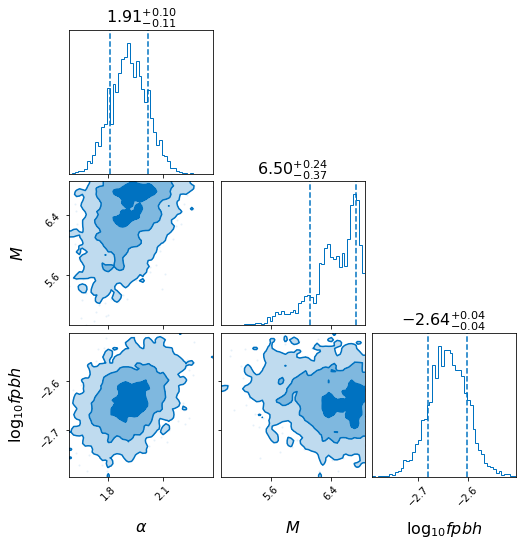

In [6]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()


In [3]:
import numpy as np
np.exp(-1060.368-(-1059.554))

0.4430821880822339

In [4]:
10**(-2.59)

0.0025703957827688645

In [5]:
import matplotlib.lines as mlines

outdir1 = "H0_GWTC-3_PBH-power-1st_flatLCDM_3/"
outdir2 = "H0_GWTC-3_PBH-power-2nd_flatLCDM_2/"

posteriors1 = np.loadtxt(f"{outdir1}/dynesty_samples.dat", skiprows=1)
posteriors2 = np.loadtxt(f"{outdir2}/dynesty_samples.dat", skiprows=1)

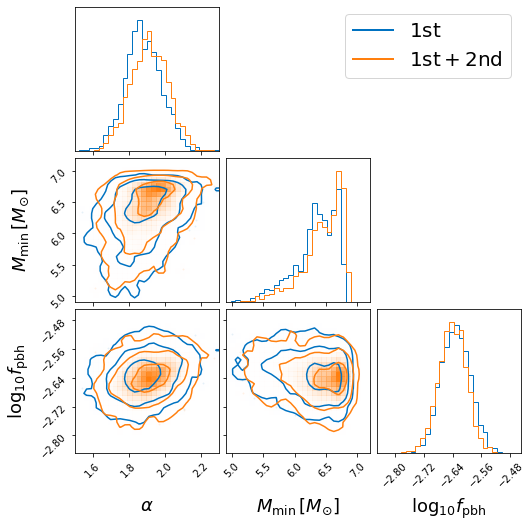

In [6]:
fig = corner.corner(posteriors1, bins=30, smooth=0.9, color='#0072C1', labels=[r"$\alpha$", r"$M_\mathrm{min}\, [M_{\odot}]$", r"$\log_{10}f_\mathrm{pbh}$"],
                    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), plot_density=True, plot_datapoints=True, fill_contours=False,
                    show_titles=False, title_kwargs={"fontsize": 18}, label_kwargs=dict(fontsize=18), range=((1.5, 2.3), (4.9, 7.2), (-2.85, -2.45)))

corner.corner(posteriors2, bins=30, smooth=0.9, color='#FF7F0E', labels=[r"$\alpha$", r"$M_\mathrm{min}\, [M_{\odot}]$", r"$\log_{10}f_\mathrm{pbh}$"],
              levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), plot_density=True, plot_datapoints=True, fill_contours=False,
              show_titles=False, title_kwargs={"fontsize": 18}, label_kwargs=dict(fontsize=18), range=((1.5, 2.3), (4.9, 7.2), (-2.85, -2.45)), fig=fig)

blue_line = mlines.Line2D([], [], color='#0072C1', lw=2, label=r'$\rm{1st}$')
orange_line = mlines.Line2D([], [], color='#FF7F0E',
                            lw=2, label=r'$\rm{1st+2nd}$')
plt.legend(handles=[blue_line, orange_line], bbox_to_anchor=(
    1, 3.12), loc='upper right', fontsize=20)  # prop={'size': 8})
plt.savefig("../latex/post-power.pdf")
plt.show()


In [7]:
def get_credibles(posts):
    x_low, x_median, x_up = np.quantile(posts, [0.05, 0.5, 0.95])
    return x_median, (x_up - x_median), (x_median - x_low)


In [8]:
posts = posteriors2[:, 0]
get_credibles(posts)

(1.9115234035597806, 0.1721128073153042, 0.16881923238875896)

In [9]:
posts = posteriors2[:, 1]
get_credibles(posts)

(6.5020619270578806, 0.29886333146110644, 0.764132797973744)

In [10]:
posts = posteriors2[:, 2]
get_credibles(posts)

(-2.6405520440311117, 0.060760629745804096, 0.0645493705879665)